In [1]:
import pandas as pd
import pandas as pd
from tensorflow.keras.optimizers import Adam

import tensorflow as tf

In [2]:
dataset = tf.keras.utils.get_file("train.csv", "https://storage.googleapis.com/tf-datasets/titanic/train.csv")

# Read the dataset into a Pandas DataFrame
TITANIC = pd.read_csv(dataset)

In [3]:
import sys
sys.path.append('..')
from xDL.models.NATT import NATT

In [4]:
model = NATT(
    "survived ~  -1 + MLP(fare) + MLP(age) + Transformer(sex):Transformer(deck):Transformer(embark_town)", 
    data=TITANIC, 
    feature_dropout=0.0001
    )

In [5]:
optimizer = Adam(learning_rate=0.001)
model.compile(
    optimizer = optimizer,
    loss = {"output": tf.keras.losses.BinaryCrossentropy(), "importances": None, "att_weights": None},
    metrics= {"output": [tf.keras.metrics.AUC(name="PR AUC", curve='PR'), tf.keras.metrics.AUC(name="auc")], "importances": None, "att_weights": None},)

history = model.fit(
    model.training_dataset, 
    epochs=100, 
    validation_data=model.validation_dataset,
    verbose=1
)

Epoch 1/100
1/1 [==============================] - 22s 22s/step - loss: 0.8859 - output_loss: 0.8859 - output_PR AUC: 0.3587 - output_auc: 0.4655 - val_loss: 0.6969 - val_output_loss: 0.6969 - val_output_PR AUC: 0.3823 - val_output_auc: 0.4710
Epoch 2/100
1/1 [==============================] - 0s 261ms/step - loss: 0.7682 - output_loss: 0.7682 - output_PR AUC: 0.4359 - output_auc: 0.5791 - val_loss: 0.6915 - val_output_loss: 0.6915 - val_output_PR AUC: 0.4197 - val_output_auc: 0.4936
Epoch 3/100
1/1 [==============================] - 0s 207ms/step - loss: 0.7220 - output_loss: 0.7220 - output_PR AUC: 0.5188 - output_auc: 0.6163 - val_loss: 0.6821 - val_output_loss: 0.6821 - val_output_PR AUC: 0.3677 - val_output_auc: 0.4848
Epoch 4/100
1/1 [==============================] - 0s 185ms/step - loss: 0.6826 - output_loss: 0.6826 - output_PR AUC: 0.5346 - output_auc: 0.6475 - val_loss: 0.7114 - val_output_loss: 0.7114 - val_output_PR AUC: 0.4723 - val_output_auc: 0.4494
Epoch 5/100
1/1 [====

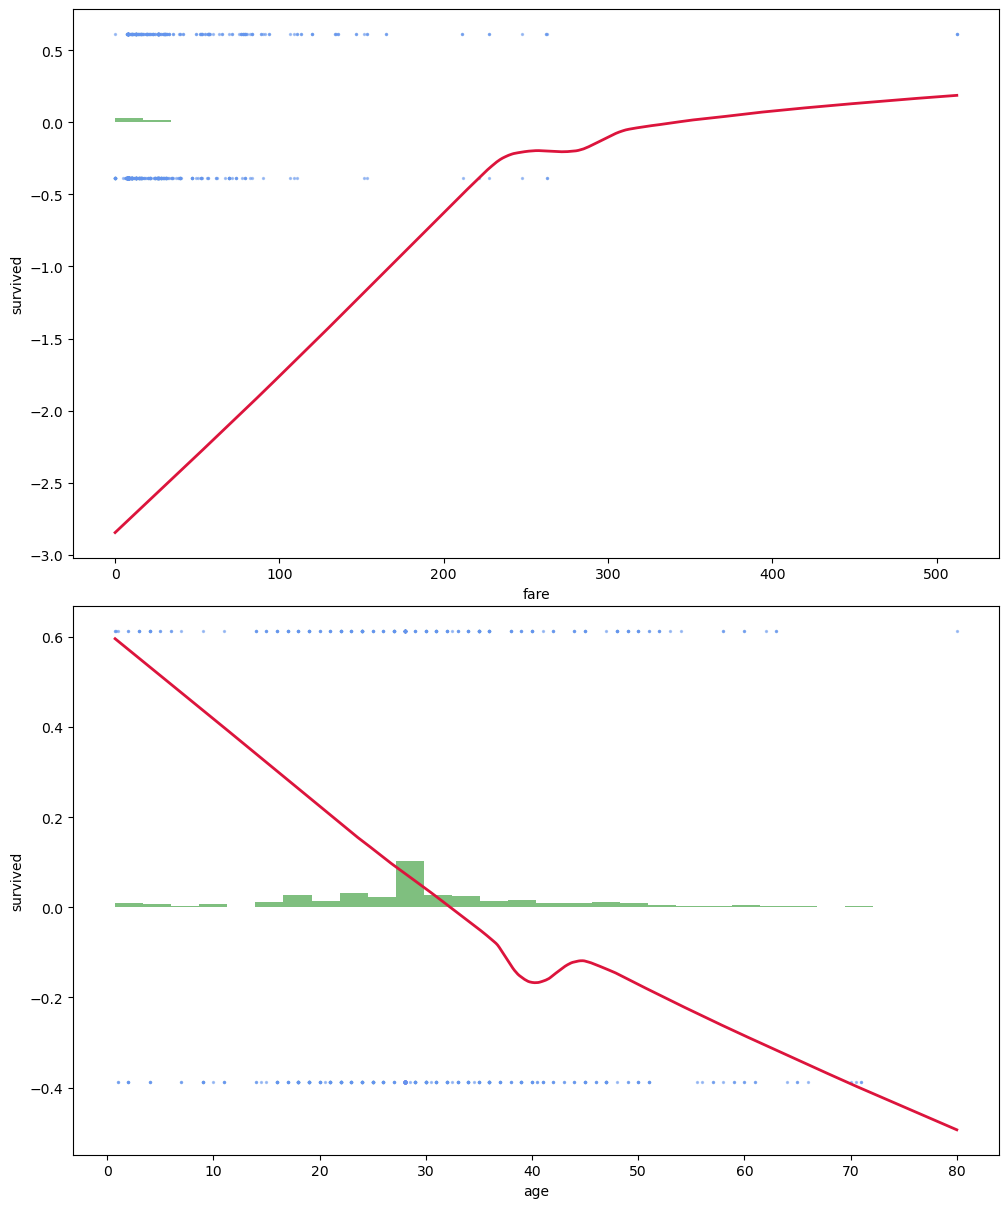

In [6]:
model.plot()

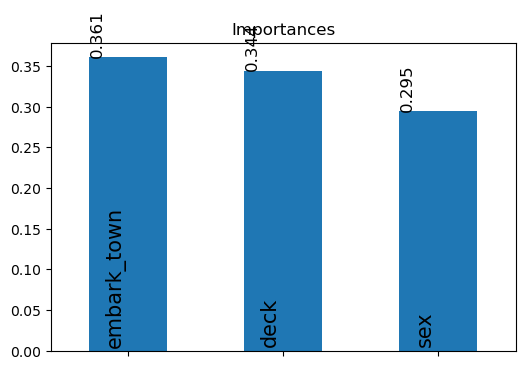

In [7]:
model.plot_importances()

<Figure size 1200x400 with 0 Axes>

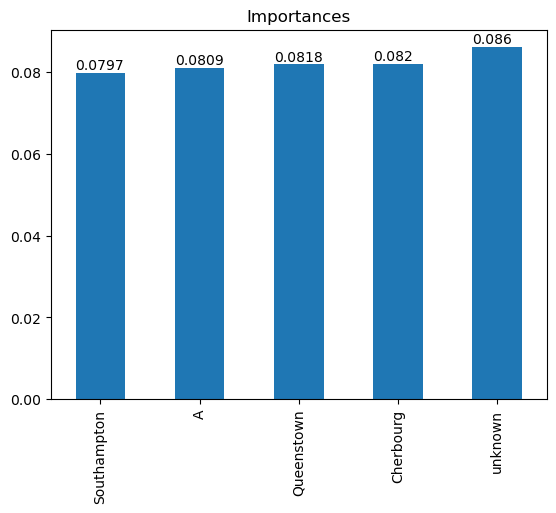

In [8]:
model.plot_categorical_importances()

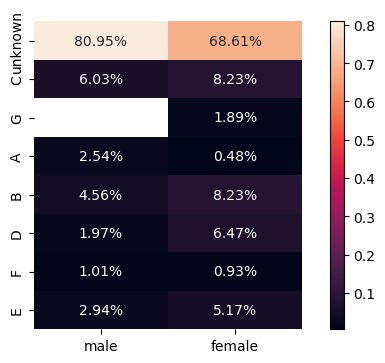

In [11]:
model.plot_heatmap_importances("sex", "deck")

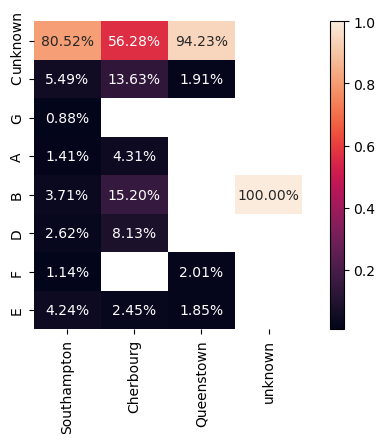

In [12]:
model.plot_heatmap_importances("embark_town", "deck")

# test continuous feature interactions

In [13]:
model = NATT(
    "survived ~  -1 + MLP(fare):MLP(age) + Transformer(sex):Transformer(deck):Transformer(embark_town)",
    data=TITANIC, 
    feature_dropout=0.0001)

In [17]:
optimizer = Adam(learning_rate=0.001)
model.compile(
    optimizer = optimizer,
    loss = {"output": tf.keras.losses.BinaryCrossentropy(), "importances": None, "att_weights": None},
    metrics= {"output": [tf.keras.metrics.AUC(name="PR AUC", curve='PR'), "accuracy"], "importances": None, "att_weights": None},)

history = model.fit(
    model.training_dataset, 
    epochs=30, 
    validation_data=model.validation_dataset,
    verbose=1
)

Epoch 1/30


1/1 [==============================] - 9s 9s/step - loss: 0.4967 - output_loss: 0.4967 - output_PR AUC: 0.7590 - output_accuracy: 0.7908 - val_loss: 0.5359 - val_output_loss: 0.5359 - val_output_PR AUC: 0.6014 - val_output_accuracy: 0.7440
Epoch 2/30
1/1 [==============================] - 0s 142ms/step - loss: 0.4573 - output_loss: 0.4573 - output_PR AUC: 0.7994 - output_accuracy: 0.7988 - val_loss: 0.5004 - val_output_loss: 0.5004 - val_output_PR AUC: 0.7407 - val_output_accuracy: 0.7840
Epoch 3/30
1/1 [==============================] - 0s 162ms/step - loss: 0.4733 - output_loss: 0.4733 - output_PR AUC: 0.7932 - output_accuracy: 0.7669 - val_loss: 0.5233 - val_output_loss: 0.5233 - val_output_PR AUC: 0.7939 - val_output_accuracy: 0.7360
Epoch 4/30
1/1 [==============================] - 0s 166ms/step - loss: 0.4498 - output_loss: 0.4498 - output_PR AUC: 0.8032 - output_accuracy: 0.8028 - val_loss: 0.4851 - val_output_loss: 0.4851 - val_output_PR AUC: 0.8652 - val_output_accuracy: 0.752

In [15]:
model.feature_nets

ListWrapper([<keras.src.engine.functional.Functional object at 0x0000023FEEA34B10>])

100/100 [==============================] - 0s 1ms/step


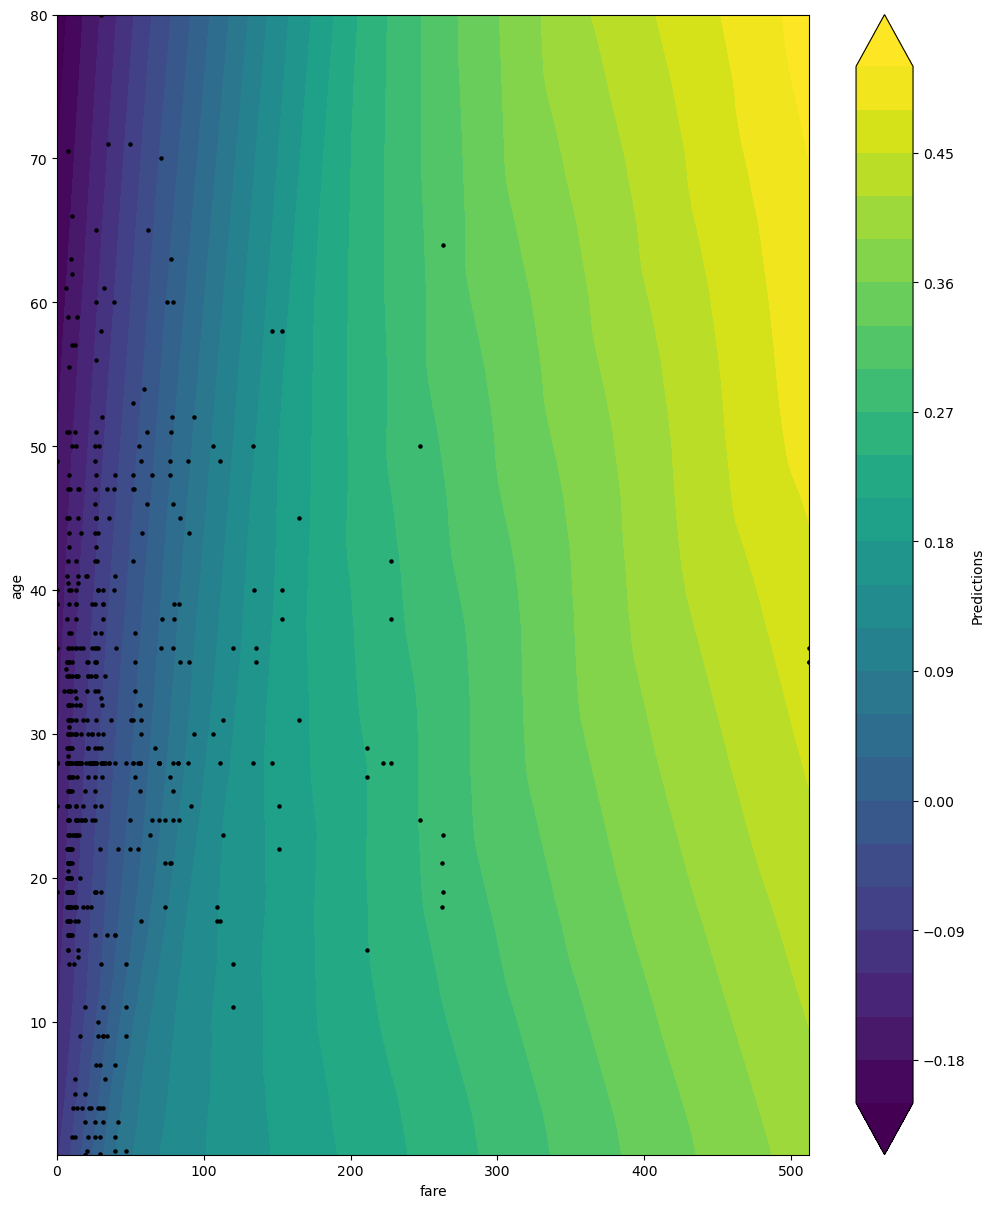

In [16]:
model.plot()